<a href="https://colab.research.google.com/github/qoo556625/Stock_skyrocket/blob/main/wordcloud2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
from datetime import timedelta
from datetime import date

f = open("fulltext", "w", encoding="utf-8")
fulltext= ""

for d in range(14):
    now = date.today()
    past_day = timedelta(days=d)
    day = now - past_day
    m= str(day)[-5:-3]
    s= str(day)[-2:]

    url = "https://www.tpex.org.tw/web/stock/historical/active_advanced/rt_rally_print.php?l=zh-tw&t=D&d=110/"+m+"/"+s+"&s=0,asc,1"
    print(day)
    h={
        'Cache-Control': 'max-age=600, private, must-revalidate',
    'Connection': 'Keep-Alive',
    'Content-Security-Policy': "frame-ancestors 'self' *.twse.com.tw *.tdcc.com.tw digitalprocesssys-epassbook.cdn.hinet.net http://digitalprocesssyst-epassbook.cdn.hinet.net;",
    'Content-Type': 'text/html; charset=utf-8',
    'Date': 'Sat 13 Mar 2021 07:43:42 GMT',
    'Keep-Alive': 'timeout=5, max=100',
    'Permissions-Policy': 'accelerometer=(), camera=(), geolocation=(), gyroscope=(), magnetometer=(), microphone=(), payment=(), usb=()',
    'Referrer-Policy': 'strict-origin-when-cross-origin',
    'Server': 'Apache',
    'Strict-Transport-Security': 'max-age=31536000;includeSubdomains; preload',
    'Transfer-Encoding': 'chunked',
    'Vary': 'Origin',
    'X-Content-Type-Options': 'nosniff',
    'X-Frame-Options': 'ALLOW-FROM https://www.tpex.org.tw',
    'X-XSS-Protection': '1;mode=block'
    }
    
    response = requests.get(url,h)
    response.encoding="utf-8"
    html = BeautifulSoup(response.text)
    tr = html.find("body").find("table").find("tbody").find_all("tr")
    for td in tr:
        name = td.find_all("td",align="center")[1].text
        number = td.find("td").text
        if int(number)   <= 50:
            print(name)
            fulltext = fulltext + " "+ name
            fulltext = fulltext.replace("-", "")
            f.write(fulltext)
f.close()


In [ ]:
!pip install wordcloud

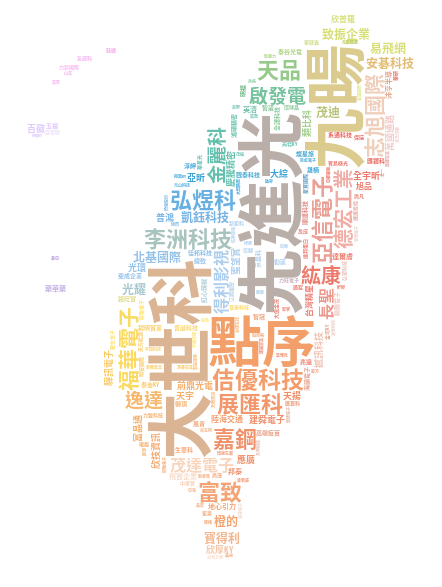

In [ ]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import os
# matplotlib inline
mask_path = "map.jpg"

mask = np.array(Image.open(mask_path))

wc = WordCloud(font_path = "./NotoSansMonoCJKtc-Bold.otf",
               background_color="white", max_words=5000,
               mask=mask,collocations=False)
fulltext = open("fulltext","r",encoding="utf-8").read()

wc.generate(fulltext)

color = ImageColorGenerator(mask)
wc.recolor(color_func = color)

wc.to_file("./result_cloud.png")
wc.to_image()

<function matplotlib.pyplot.show>

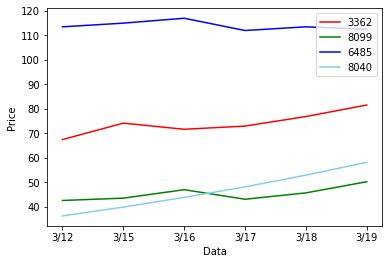

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
data = ["3/12","3/15","3/16","3/17","3/18","3/19"]
f =[67.5,74.2,71.7,73,76.9,81.6]
d =[42.65,43.6,47.05,43.15,45.75,50.3]
p =[113.5,115,117,112,113.5,112.5]
n =[36.35,39.95,43.9,48.2,53,58.2]

plt.plot(data,f,color="red",label="3362") # 先進光
plt.plot(data,d,color="green",label="8099") # 大世科
plt.plot(data,p,color="blue",label="6485") # 點序
plt.plot(data,n,color="skyblue",label="8040") # 九暘



plt.legend(loc='upper right')
plt.xlabel("Data")
plt.ylabel("Price")
plt.show